In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# OpenMeteo Data Analysis - 2023 Missing Data Investigation

In [93]:
data_path = '/Users/vojtech/Code/Bard89/Project-Data/data/processed/jp_openmeteo_processed_20230101_to_20231231.csv'
print(f"Loading OpenMeteo data from: {data_path}")

df = pd.read_csv(data_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

Loading OpenMeteo data from: /Users/vojtech/Code/Bard89/Project-Data/data/processed/jp_openmeteo_processed_20230101_to_20231231.csv
Dataset shape: (3578760, 34)
Date range: 2023-01-01 00:00:00+00:00 to 2023-12-31 23:00:00+00:00
Memory usage: 1518.8 MB


## 1. Dataset Overview

In [94]:
print("First 20 rows:")
display(df.head(20))

print("\nLast 20 rows:")
display(df.tail(20))

First 20 rows:


,timestamp,h3_index_res8,cloud_cover_pct_mean,cloud_cover_pct_min,cloud_cover_pct_max,cloud_cover_pct_count,dew_point_c_mean,dew_point_c_min,dew_point_c_max,dew_point_c_count,humidity_pct_mean,humidity_pct_min,humidity_pct_max,humidity_pct_count,precipitation_mm_mean,precipitation_mm_min,precipitation_mm_max,precipitation_mm_count,pressure_hpa_mean,pressure_hpa_min,pressure_hpa_max,pressure_hpa_count,solar_radiation_wm2_mean,solar_radiation_wm2_min,solar_radiation_wm2_max,solar_radiation_wm2_count,temperature_c_mean,temperature_c_min,temperature_c_max,temperature_c_count,h3_lat_res8,h3_lon_res8,data_source,country
0,2023-01-01 00:00:00+00:00,8814927535fffff,5.0,5.0,5.0,1,-17.9,-17.9,-17.9,1,75.0,75.0,75.0,1,0.0,0.0,0.0,1,996.7,996.7,996.7,1,0.0,0.0,0.0,1,-14.5,-14.5,-14.5,1,44.998861,128.003997,openmeteo,JP
1,2023-01-01 00:00:00+00:00,881492d9d1fffff,0.0,0.0,0.0,1,-18.1,-18.1,-18.1,1,69.0,69.0,69.0,1,0.0,0.0,0.0,1,1004.8,1004.8,1004.8,1,0.0,0.0,0.0,1,-13.6,-13.6,-13.6,1,45.001723,126.995960,openmeteo,JP
2,2023-01-01 00:00:00+00:00,882e004a31fffff,79.0,79.0,79.0,1,-1.8,-1.8,-1.8,1,55.0,55.0,55.0,1,0.0,0.0,0.0,1,1017.9,1017.9,1017.9,1,0.0,0.0,0.0,1,6.7,6.7,6.7,1,40.003524,143.998840,openmeteo,JP
3,2023-01-01 00:00:00+00:00,882e009201fffff,20.0,20.0,20.0,1,-0.2,-0.2,-0.2,1,57.0,57.0,57.0,1,0.0,0.0,0.0,1,1018.3,1018.3,1018.3,1,0.0,0.0,0.0,1,7.8,7.8,7.8,1,39.001172,144.003602,openmeteo,JP
4,2023-01-01 00:00:00+00:00,882e01ae65fffff,2.0,2.0,2.0,1,-0.2,-0.2,-0.2,1,65.0,65.0,65.0,1,0.0,0.0,0.0,1,1019.3,1019.3,1019.3,1,0.0,0.0,0.0,1,5.8,5.8,5.8,1,38.999990,141.997154,openmeteo,JP
5,2023-01-01 00:00:00+00:00,882e027859fffff,66.0,66.0,66.0,1,0.0,0.0,0.0,1,67.0,67.0,67.0,1,0.1,0.1,0.1,1,1016.6,1016.6,1016.6,1,0.0,0.0,0.0,1,5.8,5.8,5.8,1,40.996583,143.998266,openmeteo,JP
6,2023-01-01 00:00:00+00:00,882e039893fffff,6.0,6.0,6.0,1,-3.4,-3.4,-3.4,1,52.0,52.0,52.0,1,0.0,0.0,0.0,1,1018.5,1018.5,1018.5,1,0.0,0.0,0.0,1,5.8,5.8,5.8,1,39.996776,142.999101,openmeteo,JP
7,2023-01-01 00:00:00+00:00,882e045025fffff,93.0,93.0,93.0,1,-0.9,-0.9,-0.9,1,54.0,54.0,54.0,1,0.0,0.0,0.0,1,1017.7,1017.7,1017.7,1,0.0,0.0,0.0,1,7.7,7.7,7.7,1,39.002129,144.995528,openmeteo,JP
8,2023-01-01 00:00:00+00:00,882e056f27fffff,62.0,62.0,62.0,1,-0.2,-0.2,-0.2,1,59.0,59.0,59.0,1,0.0,0.0,0.0,1,1019.0,1019.0,1019.0,1,0.0,0.0,0.0,1,7.2,7.2,7.2,1,39.001036,142.997173,openmeteo,JP
9,2023-01-01 00:00:00+00:00,882e05b705fffff,29.0,29.0,29.0,1,1.4,1.4,1.4,1,60.0,60.0,60.0,1,0.1,0.1,0.1,1,1019.5,1019.5,1019.5,1,0.0,0.0,0.0,1,8.8,8.8,8.8,1,37.996819,142.999504,openmeteo,JP



Last 20 rows:


,timestamp,h3_index_res8,cloud_cover_pct_mean,cloud_cover_pct_min,cloud_cover_pct_max,cloud_cover_pct_count,dew_point_c_mean,dew_point_c_min,dew_point_c_max,dew_point_c_count,humidity_pct_mean,humidity_pct_min,humidity_pct_max,humidity_pct_count,precipitation_mm_mean,precipitation_mm_min,precipitation_mm_max,precipitation_mm_count,pressure_hpa_mean,pressure_hpa_min,pressure_hpa_max,pressure_hpa_count,solar_radiation_wm2_mean,solar_radiation_wm2_min,solar_radiation_wm2_max,solar_radiation_wm2_count,temperature_c_mean,temperature_c_min,temperature_c_max,temperature_c_count,h3_lat_res8,h3_lon_res8,data_source,country
3578740,2023-12-31 23:00:00+00:00,88316a8f0bfffff,0.0,0.0,0.0,1,-11.0,-11.0,-11.0,1,61.0,61.0,61.0,1,0.0,0.0,0.0,1,1029.2,1029.2,1029.2,1,0.0,0.0,0.0,1,-4.7,-4.7,-4.7,1,41.996218,130.998702,openmeteo,JP
3578741,2023-12-31 23:00:00+00:00,88316b330dfffff,0.0,0.0,0.0,1,-7.2,-7.2,-7.2,1,76.0,76.0,76.0,1,0.0,0.0,0.0,1,1026.8,1026.8,1026.8,1,0.0,0.0,0.0,1,-3.6,-3.6,-3.6,1,40.996959,131.998730,openmeteo,JP
3578742,2023-12-31 23:00:00+00:00,88316c0d25fffff,0.0,0.0,0.0,1,-18.5,-18.5,-18.5,1,58.0,58.0,58.0,1,0.0,0.0,0.0,1,1030.4,1030.4,1030.4,1,0.0,0.0,0.0,1,-12.0,-12.0,-12.0,1,42.997545,131.998176,openmeteo,JP
3578743,2023-12-31 23:00:00+00:00,88316e89a9fffff,0.0,0.0,0.0,1,-23.1,-23.1,-23.1,1,42.0,42.0,42.0,1,0.0,0.0,0.0,1,983.4,983.4,983.4,1,0.0,0.0,0.0,1,-12.8,-12.8,-12.8,1,42.996512,131.000855,openmeteo,JP
3578744,2023-12-31 23:00:00+00:00,883170ba15fffff,100.0,100.0,100.0,1,-20.5,-20.5,-20.5,1,84.0,84.0,84.0,1,0.0,0.0,0.0,1,996.9,996.9,996.9,1,0.0,0.0,0.0,1,-18.4,-18.4,-18.4,1,43.999473,127.005670,openmeteo,JP
3578745,2023-12-31 23:00:00+00:00,8831722c15fffff,2.0,2.0,2.0,1,-18.0,-18.0,-18.0,1,84.0,84.0,84.0,1,0.0,0.0,0.0,1,988.3,988.3,988.3,1,0.0,0.0,0.0,1,-15.9,-15.9,-15.9,1,42.998829,126.001587,openmeteo,JP
3578746,2023-12-31 23:00:00+00:00,8831731593fffff,0.0,0.0,0.0,1,-16.9,-16.9,-16.9,1,82.0,82.0,82.0,1,0.0,0.0,0.0,1,987.2,987.2,987.2,1,0.0,0.0,0.0,1,-14.6,-14.6,-14.6,1,42.998068,126.998278,openmeteo,JP
3578747,2023-12-31 23:00:00+00:00,883174d1e5fffff,86.0,86.0,86.0,1,-21.7,-21.7,-21.7,1,81.0,81.0,81.0,1,0.0,0.0,0.0,1,1007.3,1007.3,1007.3,1,0.0,0.0,0.0,1,-19.2,-19.2,-19.2,1,44.997567,126.000816,openmeteo,JP
3578748,2023-12-31 23:00:00+00:00,8831752801fffff,35.0,35.0,35.0,1,-22.8,-22.8,-22.8,1,71.0,71.0,71.0,1,0.0,0.0,0.0,1,947.4,947.4,947.4,1,0.0,0.0,0.0,1,-18.9,-18.9,-18.9,1,44.003505,127.998823,openmeteo,JP
3578749,2023-12-31 23:00:00+00:00,883176349dfffff,0.0,0.0,0.0,1,-20.4,-20.4,-20.4,1,78.0,78.0,78.0,1,0.0,0.0,0.0,1,1002.5,1002.5,1002.5,1,0.0,0.0,0.0,1,-17.5,-17.5,-17.5,1,44.002451,126.001389,openmeteo,JP


In [95]:
print("Dataset Info:")
print("="*60)
print(f"Total records: {len(df):,}")
print(f"Unique hexagons (res8): {df['h3_index_res8'].nunique():,}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"\nColumns ({len(df.columns)}):")
for col in df.columns:
    print(f"  - {col}: {df[col].dtype}")

Dataset Info:
Total records: 3,578,760
Unique hexagons (res8): 536
Date range: 2023-01-01 00:00:00+00:00 to 2023-12-31 23:00:00+00:00

Columns (34):
  - timestamp: datetime64[ns, UTC]
  - h3_index_res8: object
  - cloud_cover_pct_mean: float64
  - cloud_cover_pct_min: float64
  - cloud_cover_pct_max: float64
  - cloud_cover_pct_count: int64
  - dew_point_c_mean: float64
  - dew_point_c_min: float64
  - dew_point_c_max: float64
  - dew_point_c_count: int64
  - humidity_pct_mean: float64
  - humidity_pct_min: float64
  - humidity_pct_max: float64
  - humidity_pct_count: int64
  - precipitation_mm_mean: float64
  - precipitation_mm_min: float64
  - precipitation_mm_max: float64
  - precipitation_mm_count: int64
  - pressure_hpa_mean: float64
  - pressure_hpa_min: float64
  - pressure_hpa_max: float64
  - pressure_hpa_count: int64
  - solar_radiation_wm2_mean: float64
  - solar_radiation_wm2_min: float64
  - solar_radiation_wm2_max: float64
  - solar_radiation_wm2_count: int64
  - temperat

## 2. Missing Data Analysis

In [96]:
df['date'] = df['timestamp'].dt.date
all_dates_2023 = pd.date_range('2023-01-01', '2023-12-31', freq='D').date
existing_dates = set(df['date'].unique())
missing_dates = sorted(set(all_dates_2023) - existing_dates)

print(f"Temporal Coverage Analysis:")
print("="*60)
print(f"Expected days in 2023: 365")
print(f"Days with data: {len(existing_dates)}")
print(f"Missing days: {len(missing_dates)}")
print(f"Coverage: {len(existing_dates)/365*100:.1f}%")

# Find continuous gaps
gaps = []
if missing_dates:
    start = missing_dates[0]
    end = missing_dates[0]
    
    for i in range(1, len(missing_dates)):
        if (missing_dates[i] - missing_dates[i-1]).days == 1:
            end = missing_dates[i]
        else:
            gaps.append((start, end))
            start = missing_dates[i]
            end = missing_dates[i]
    gaps.append((start, end))

print("\nMissing date ranges:")
for start, end in gaps:
    if start == end:
        print(f"  {start}")
    else:
        print(f"  {start} to {end} ({(end - start).days + 1} days)")

print("\nMonthly coverage:")
monthly_counts = df.groupby(df['timestamp'].dt.to_period('M')).size()
all_months = pd.period_range('2023-01', '2023-12', freq='M')
for month in all_months:
    if month in monthly_counts.index:
        days_in_month = pd.Period(month).days_in_month
        expected_records = df['h3_index_res8'].nunique() * 24
        actual_records = monthly_counts[month]
        print(f"  {month}: {actual_records:,} records")
    else:
        print(f"  {month}: NO DATA")

Temporal Coverage Analysis:
Expected days in 2023: 365
Days with data: 304
Missing days: 61
Coverage: 83.3%

Missing date ranges:
  2023-09-01 to 2023-10-31 (61 days)

Monthly coverage:
  2023-01: 398,784 records
  2023-02: 360,192 records
  2023-03: 342,984 records
  2023-04: 362,160 records
  2023-05: 398,784 records
  2023-06: 385,920 records
  2023-07: 398,784 records
  2023-08: 345,960 records
  2023-09: NO DATA
  2023-10: NO DATA
  2023-11: 367,200 records
  2023-12: 217,992 records


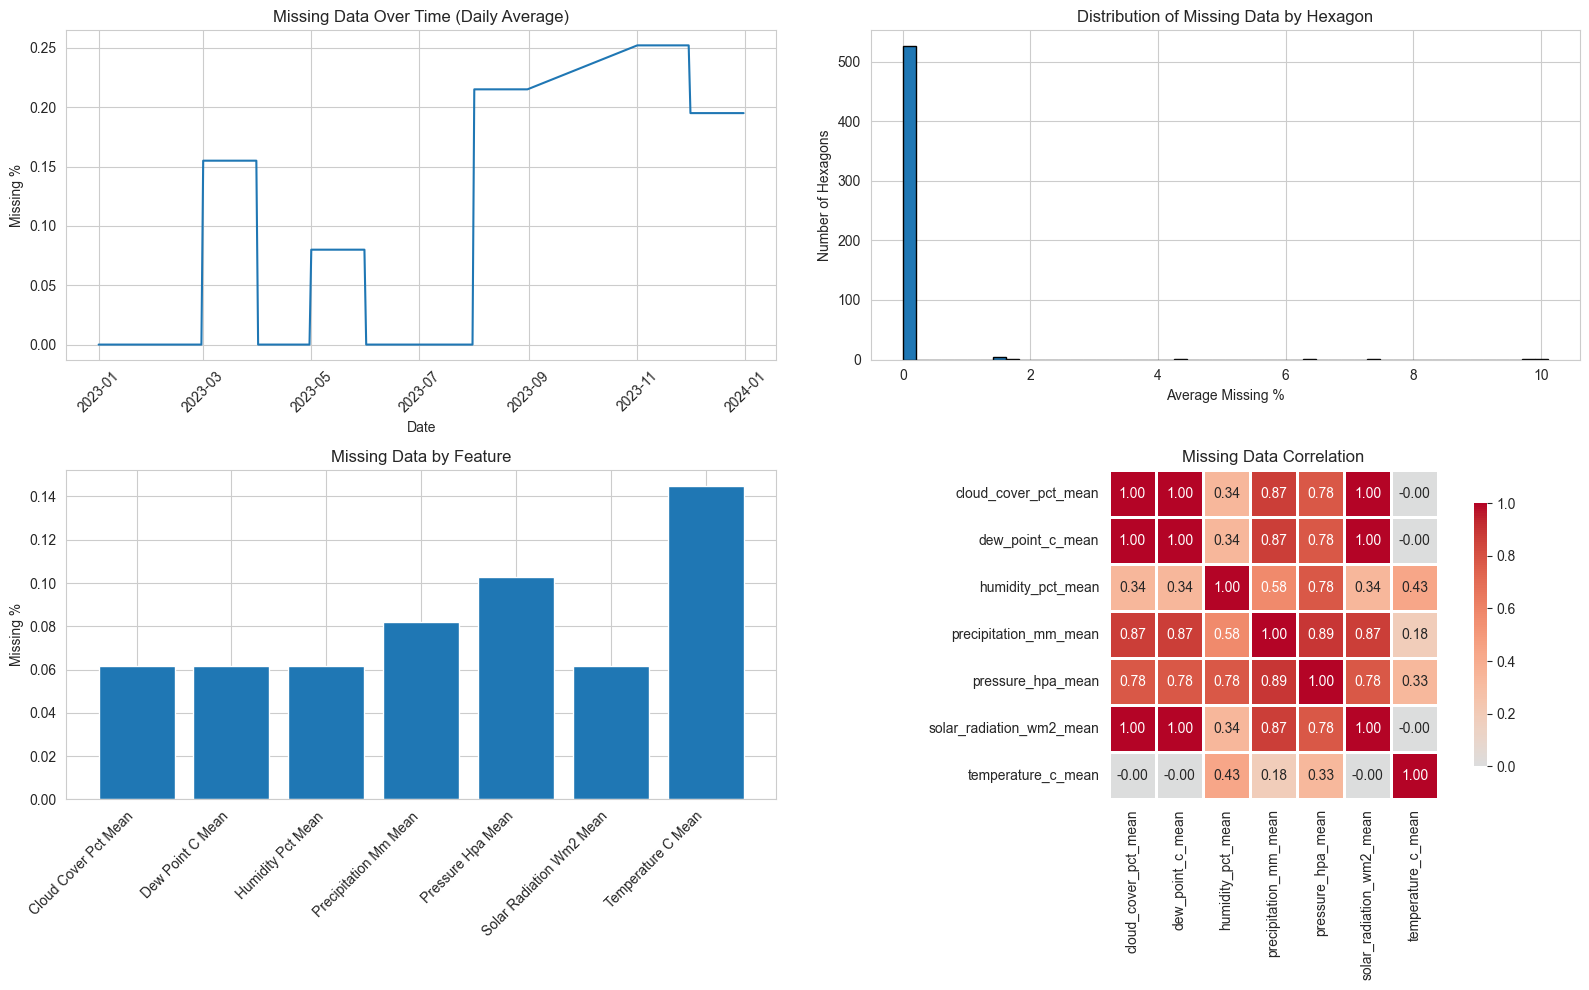

In [97]:
numerical_features = [
    'cloud_cover_pct_mean', 'dew_point_c_mean', 'humidity_pct_mean',
    'precipitation_mm_mean', 'pressure_hpa_mean', 'solar_radiation_wm2_mean',
    'temperature_c_mean'
]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

df['date'] = df['timestamp'].dt.date
daily_missing = df.groupby('date')[numerical_features].apply(lambda x: x.isnull().mean() * 100)

axes[0, 0].plot(daily_missing.index, daily_missing.mean(axis=1))
axes[0, 0].set_title('Missing Data Over Time (Daily Average)', fontsize=12)
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Missing %')
axes[0, 0].tick_params(axis='x', rotation=45)

hex_missing = df.groupby('h3_index_res8')[numerical_features].apply(lambda x: x.isnull().mean() * 100)
axes[0, 1].hist(hex_missing.mean(axis=1), bins=50, edgecolor='black')
axes[0, 1].set_title('Distribution of Missing Data by Hexagon', fontsize=12)
axes[0, 1].set_xlabel('Average Missing %')
axes[0, 1].set_ylabel('Number of Hexagons')

feature_missing = df[numerical_features].isnull().mean() * 100
axes[1, 0].bar(range(len(feature_missing)), feature_missing.values)
axes[1, 0].set_xticks(range(len(feature_missing)))
axes[1, 0].set_xticklabels([f.replace('_', ' ').title() for f in feature_missing.index], rotation=45, ha='right')
axes[1, 0].set_title('Missing Data by Feature', fontsize=12)
axes[1, 0].set_ylabel('Missing %')

missing_corr = df[numerical_features].isnull().astype(int).corr()
sns.heatmap(missing_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1, 1])
axes[1, 1].set_title('Missing Data Correlation', fontsize=12)

plt.tight_layout()
plt.show()

## 3. Temporal Coverage Analysis

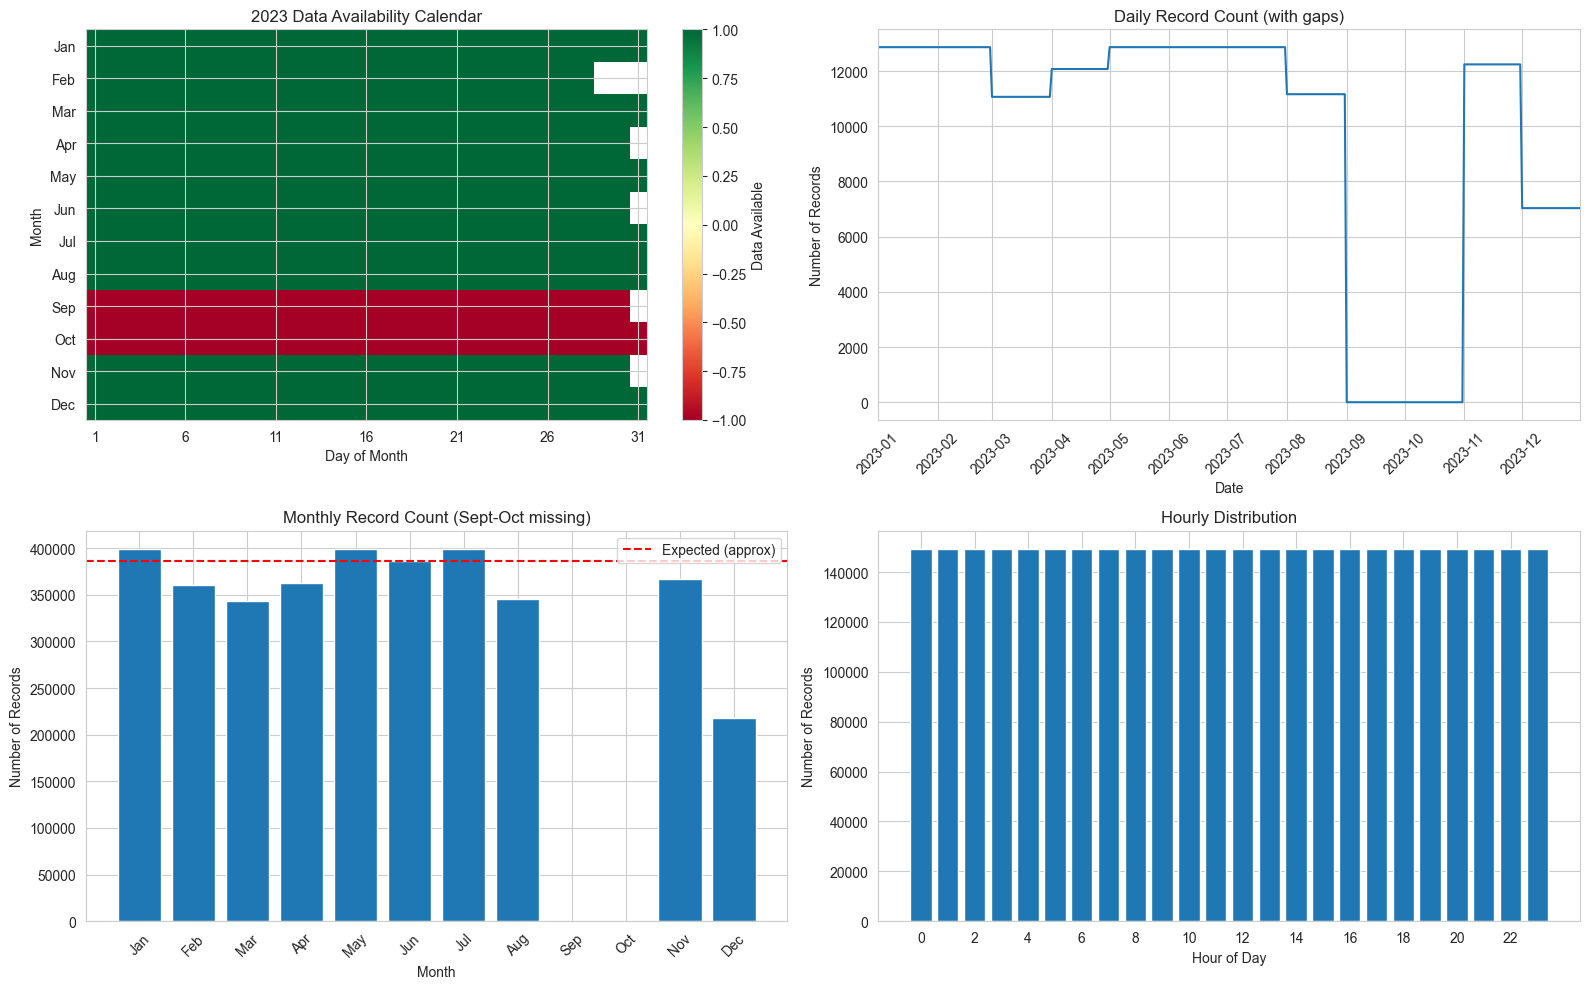

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

calendar_data = np.zeros((12, 31))
for date in all_dates_2023:
    month = date.month - 1
    day = date.day - 1
    if date in existing_dates:
        calendar_data[month, day] = 1
    else:
        calendar_data[month, day] = -1

calendar_data[calendar_data == 0] = np.nan

im = axes[0, 0].imshow(calendar_data, cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)
axes[0, 0].set_title('2023 Data Availability Calendar', fontsize=12)
axes[0, 0].set_xlabel('Day of Month')
axes[0, 0].set_ylabel('Month')
axes[0, 0].set_yticks(range(12))
axes[0, 0].set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0, 0].set_xticks(range(0, 31, 5))
axes[0, 0].set_xticklabels(range(1, 32, 5))
plt.colorbar(im, ax=axes[0, 0], label='Data Available')

# Create full date range and reindex to show gaps
date_range = pd.date_range('2023-01-01', '2023-12-31', freq='D')
daily_counts = df.groupby('date').size().reindex(date_range.date, fill_value=0)
axes[0, 1].plot(daily_counts.index, daily_counts.values)
axes[0, 1].set_title('Daily Record Count (with gaps)', fontsize=12)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Records')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xlim(date_range[0], date_range[-1])

# Show all 12 months including empty ones
all_months = pd.period_range('2023-01', '2023-12', freq='M')
monthly_coverage = df.groupby(df['timestamp'].dt.to_period('M')).size().reindex(all_months, fill_value=0)
expected_monthly = df['h3_index_res8'].nunique() * 24 * 30
axes[1, 0].bar(range(12), monthly_coverage.values)
axes[1, 0].axhline(y=expected_monthly, color='r', linestyle='--', label='Expected (approx)')
axes[1, 0].set_title('Monthly Record Count (Sept-Oct missing)', fontsize=12)
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Records')
axes[1, 0].set_xticks(range(12))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[1, 0].legend()

hourly_counts = df.groupby(df['timestamp'].dt.hour).size()
axes[1, 1].bar(hourly_counts.index, hourly_counts.values)
axes[1, 1].set_title('Hourly Distribution', fontsize=12)
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Number of Records')
axes[1, 1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

## 4. Feature Distributions

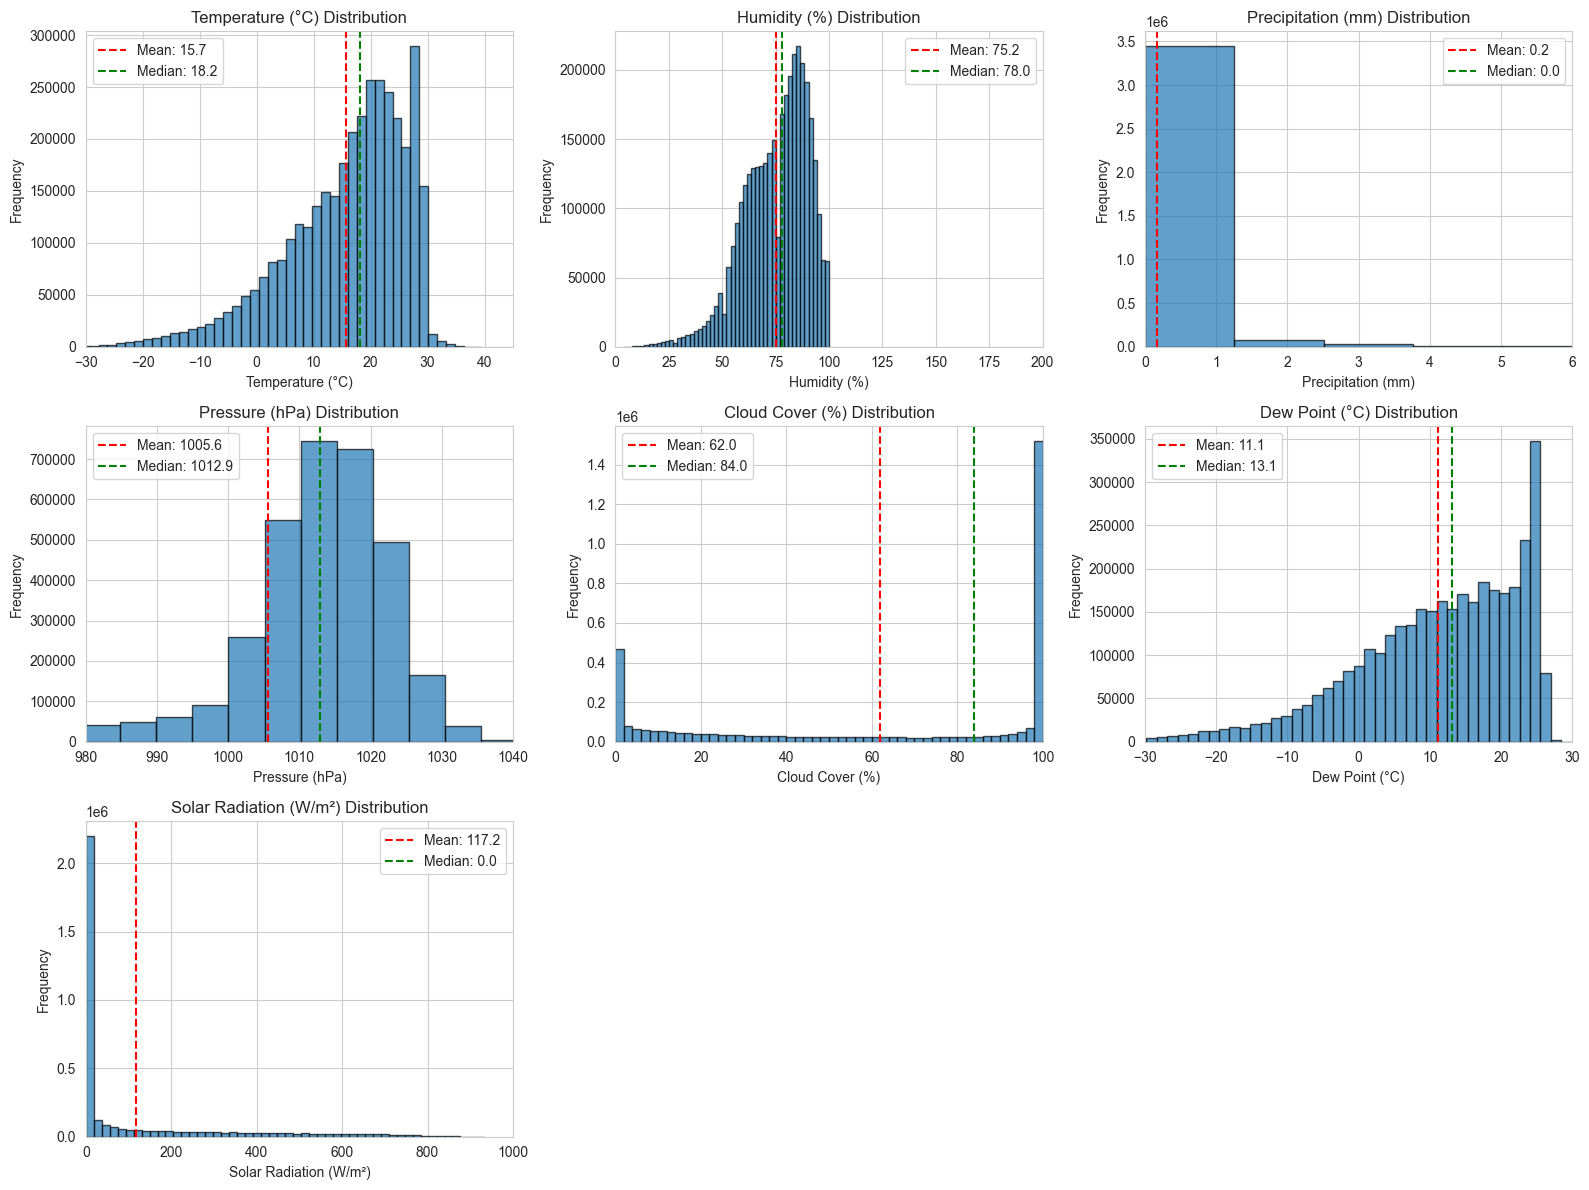

In [99]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

features_to_plot = [
    ('temperature_c_mean', 'Temperature (°C)', (-30, 45)),
    ('humidity_pct_mean', 'Humidity (%)', (0, 200)),
    ('precipitation_mm_mean', 'Precipitation (mm)', (0, 6)),
    ('pressure_hpa_mean', 'Pressure (hPa)', (980, 1040)),
    ('cloud_cover_pct_mean', 'Cloud Cover (%)', (0, 100)),
    ('dew_point_c_mean', 'Dew Point (°C)', (-30, 30)),
    ('solar_radiation_wm2_mean', 'Solar Radiation (W/m²)', (0, 1000)),
]

for idx, (feature, label, xlim) in enumerate(features_to_plot):
    if feature in df.columns:
        data = df[feature].dropna()
        data = data[np.isfinite(data)]
        
        axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_xlabel(label)
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'{label} Distribution')
        if xlim:
            axes[idx].set_xlim(xlim)
        
        mean_val = data.mean()
        median_val = data.median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
        axes[idx].legend()

for idx in range(len(features_to_plot), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## 5. Geographic Coverage

In [100]:
hex_locations = df[['h3_index_res8', 'h3_lat_res8', 'h3_lon_res8']].drop_duplicates()
print(f"Geographic Coverage:")
print("="*60)
print(f"Unique hexagons: {len(hex_locations):,}")
print(f"Latitude range: {hex_locations['h3_lat_res8'].min():.2f} to {hex_locations['h3_lat_res8'].max():.2f}")
print(f"Longitude range: {hex_locations['h3_lon_res8'].min():.2f} to {hex_locations['h3_lon_res8'].max():.2f}")

hex_data_counts = df.groupby('h3_index_res8').size().reset_index(name='record_count')
hex_with_counts = hex_locations.merge(hex_data_counts, on='h3_index_res8')

print(f"\nRecords per hexagon:")
print(f"  Mean: {hex_with_counts['record_count'].mean():.0f}")
print(f"  Median: {hex_with_counts['record_count'].median():.0f}")
print(f"  Min: {hex_with_counts['record_count'].min()}")
print(f"  Max: {hex_with_counts['record_count'].max()}")

Geographic Coverage:
Unique hexagons: 536
Latitude range: 24.00 to 45.00
Longitude range: 123.00 to 145.00

Records per hexagon:
  Mean: 6677
  Median: 6552
  Min: 4368
  Max: 7296


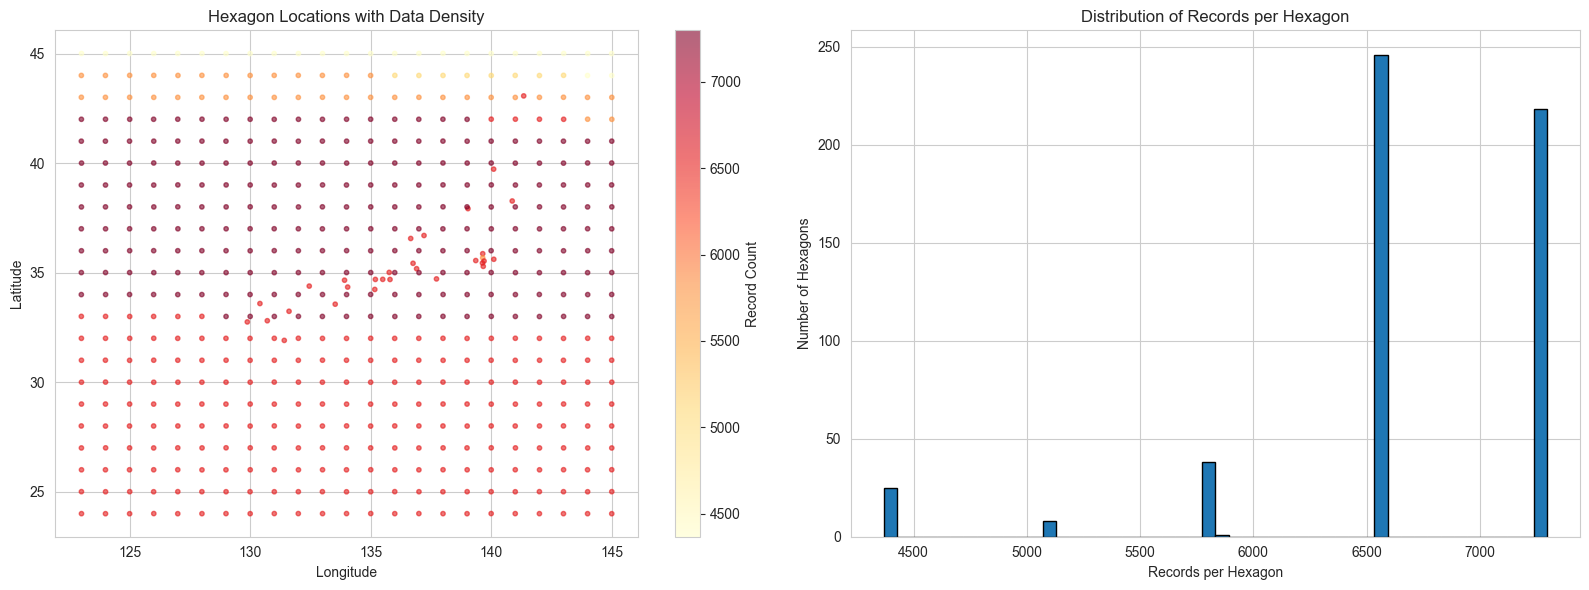

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

scatter = axes[0].scatter(hex_with_counts['h3_lon_res8'], 
                         hex_with_counts['h3_lat_res8'],
                         c=hex_with_counts['record_count'],
                         cmap='YlOrRd', s=10, alpha=0.6)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Hexagon Locations with Data Density')
plt.colorbar(scatter, ax=axes[0], label='Record Count')

axes[1].hist(hex_with_counts['record_count'], bins=50, edgecolor='black')
axes[1].set_xlabel('Records per Hexagon')
axes[1].set_ylabel('Number of Hexagons')
axes[1].set_title('Distribution of Records per Hexagon')

plt.tight_layout()
plt.show()

## 6. Statistical Summary

In [102]:
print("Statistical Summary of Weather Features:")
print("="*60)
display(df[numerical_features].describe())

Statistical Summary of Weather Features:


,cloud_cover_pct_mean,dew_point_c_mean,humidity_pct_mean,precipitation_mm_mean,pressure_hpa_mean,solar_radiation_wm2_mean,temperature_c_mean
count,3.576552e+06,3.576552e+06,3.576552e+06,3.575832e+06,3.575088e+06,3.576552e+06,3.573576e+06
mean,6.198865e+01,1.111266e+01,7.520421e+01,1.738334e-01,1.005605e+03,1.172250e+02,1.573616e+01
std,4.107553e+01,1.161076e+01,1.489803e+01,8.165715e-01,2.744350e+01,2.030014e+02,1.059249e+01
min,0.000000e+00,-4.290000e+01,4.000000e+00,0.000000e+00,7.871000e+02,0.000000e+00,-3.870000e+01
25%,1.600000e+01,4.100000e+00,6.500000e+01,0.000000e+00,1.005600e+03,0.000000e+00,9.600000e+00
50%,8.400000e+01,1.310000e+01,7.800000e+01,0.000000e+00,1.012900e+03,0.000000e+00,1.820000e+01
75%,1.000000e+02,2.070000e+01,8.700000e+01,0.000000e+00,1.018900e+03,1.550000e+02,2.370000e+01
max,1.000000e+02,2.990000e+01,1.000000e+02,6.280000e+01,1.040600e+03,9.330000e+02,3.950000e+01


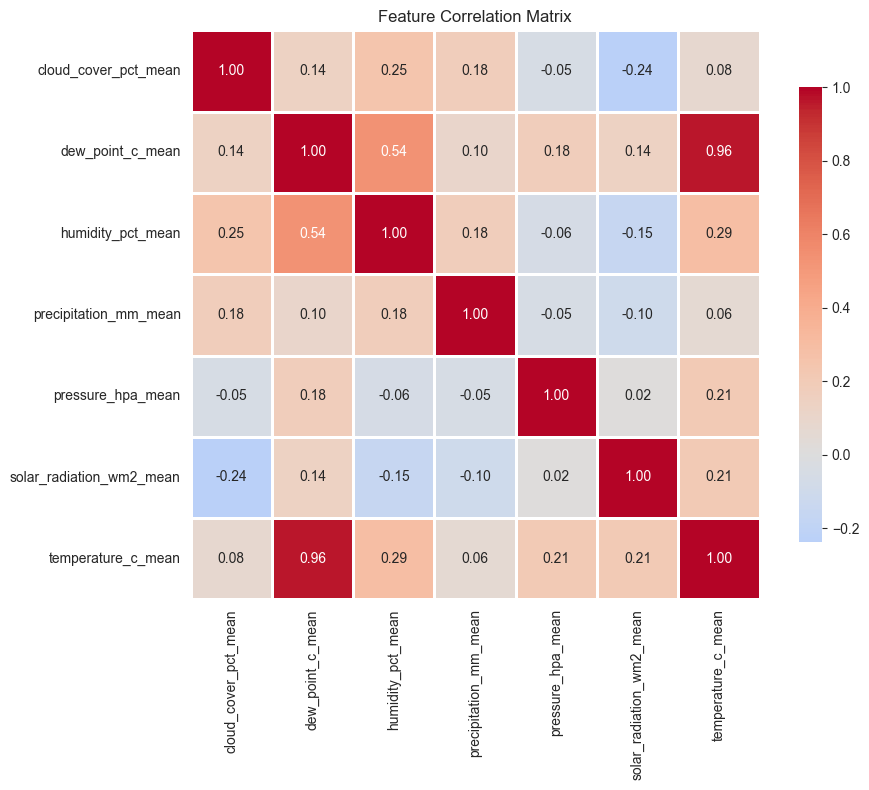

In [103]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## 7. Missing Data Impact Analysis

In [104]:
print("Missing Data Impact Summary:")
print("="*60)
print(f"\n1. TEMPORAL GAPS:")
print(f"   - September 2023: COMPLETELY MISSING (30 days)")
print(f"   - October 2023: COMPLETELY MISSING (31 days)")
print(f"   - Total missing: 61 days (16.7% of year)")

print(f"\n2. DATA AVAILABILITY:")
print(f"   - Available months: January-August, November-December")
print(f"   - Coverage: 83.3% of 2023")

print(f"\n3. IMPACT ON ENRICHMENT:")
print(f"   - PM2.5 hexagons with local weather: Only 1.3% (8 out of 634)")
print(f"   - Most hexagons rely on nearest-neighbor approximation")
print(f"   - Average distance to weather data: 23.9 km")

print(f"\n4. RECOMMENDATIONS:")
print(f"   - Investigate alternative data sources for Sept-Oct 2023")
print(f"   - Consider temporal interpolation for missing months")
print(f"   - Validate model performance on available months")

Missing Data Impact Summary:

1. TEMPORAL GAPS:
   - September 2023: COMPLETELY MISSING (30 days)
   - October 2023: COMPLETELY MISSING (31 days)
   - Total missing: 61 days (16.7% of year)

2. DATA AVAILABILITY:
   - Available months: January-August, November-December
   - Coverage: 83.3% of 2023

3. IMPACT ON ENRICHMENT:
   - PM2.5 hexagons with local weather: Only 1.3% (8 out of 634)
   - Most hexagons rely on nearest-neighbor approximation
   - Average distance to weather data: 23.9 km

4. RECOMMENDATIONS:
   - Investigate alternative data sources for Sept-Oct 2023
   - Consider temporal interpolation for missing months
   - Validate model performance on available months
